In [1]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [2]:
dataset = pd.read_csv("C:/Users/Bast/Desktop/TP_COVID_YNOV/datasets_cleaned/dataset_gouv_prepared.csv")

In [3]:
geodataframe = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset.lon, dataset.lat))
    
# Set the coordinate reference system (CRS) to EPSG 4326
geodataframe.crs = {'init': 'epsg:4326'}

E:\Anaconda\envs\dsfs\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
geodataframe.head()

departement        date  hospitalises  reanimations  nvx_hospitalises  \
0         Ain  2020-03-03             0             0                 0   
1         Ain  2020-03-04             0             0                 0   
2         Ain  2020-03-05             0             0                 0   
3         Ain  2020-03-06             0             0                 0   
4         Ain  2020-03-07             0             0                 0   

   nvlles_reanimations  gueris  deces                region        lat  \
0                    0       0      0  Auvergne-Rhône-Alpes  45.296812   
1                    0       0      0  Auvergne-Rhône-Alpes  45.296812   
2                    0       0      0  Auvergne-Rhône-Alpes  45.296812   
3                    0       0      0  Auvergne-Rhône-Alpes  45.296812   
4                    0       0      0  Auvergne-Rhône-Alpes  45.296812   

        lon                  geometry  
0  4.660481  POINT (4.66048 45.29681)  
1  4.660481  POINT (4.66048 45.29681)  
2  4.660481  POINT (4.66048 45.29681)  
3  4.660481  POINT (4.66048 45.29681)  
4  4.660481  POINT (4.66048 45.29681)

In [5]:
m_1 = folium.Map(location=[46.00,2.00], tiles='openstreetmap', zoom_start=5)

# Display the map
m_1

In [6]:
# Create the map
m_3 = folium.Map(location=[48.8534,2.3488], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in geodataframe.iterrows():
    mc.add_child(Marker([row['lat'], row['lon']]))
m_3.add_child(mc)

# Display the map
m_3

In [7]:
contour_departement = gpd.read_file("C:/Users/Bast/Desktop/departements/departements-20180101.shp")
contour_region = gpd.read_file("C:/Users/Bast/Desktop/regions/regions-20180101.shp")
contour_france = gpd.read_file("C:/Users/Bast/Desktop/france/fr_10km.shp")

In [8]:
contour_departement.head()

code_insee               nom  nuts3              wikipedia  surf_km2  \
0        974        La Réunion  FR940          fr:La Réunion    2505.0   
1         11              Aude  FR811  fr:Aude (département)    6343.0   
2         43       Haute-Loire  FR723         fr:Haute-Loire    5003.0   
3         13  Bouches-du-Rhône  FR823    fr:Bouches-du-Rhône    5247.0   
4         47    Lot-et-Garonne  FR614      fr:Lot-et-Garonne    5385.0   

                                            geometry  
0  MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...  
1  POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...  
2  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...  
3  MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...  
4  POLYGON ((-0.14058 44.22648, -0.12931 44.23218...

<AxesSubplot:>

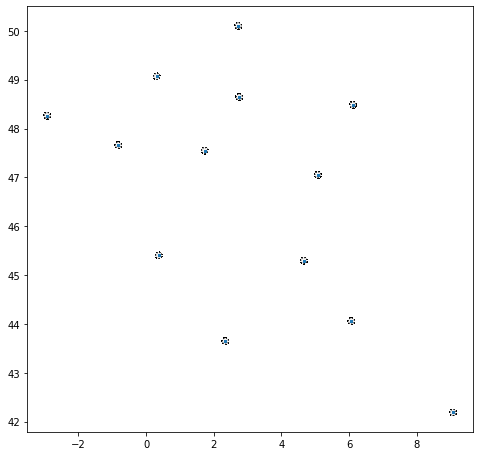

In [9]:
# Create a map
ax = geodataframe.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
geodataframe.to_crs(epsg=4326).plot(markersize=1, ax=ax)

<AxesSubplot:>

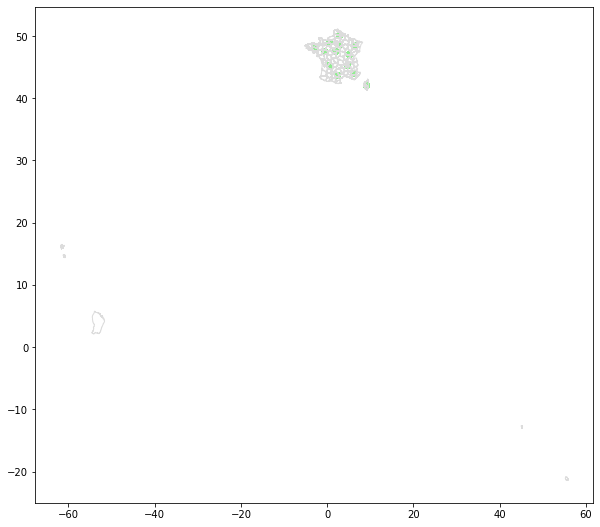

In [10]:
# Define a base map with county boundaries
ax = contour_departement.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
geodataframe.plot(color='lightgreen', ax=ax)


<AxesSubplot:>

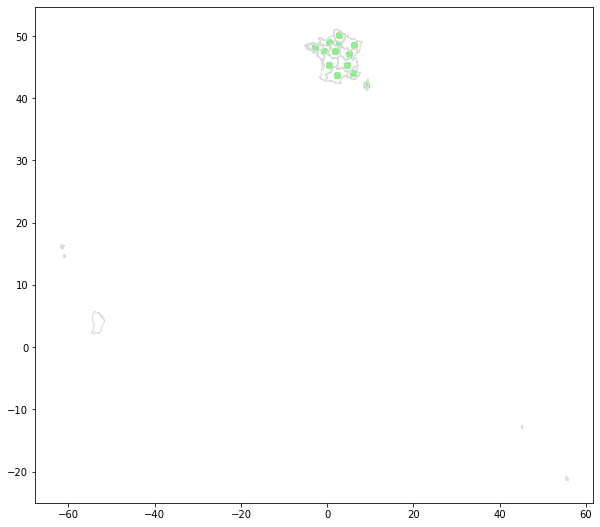

In [11]:
# Define a base map with county boundaries
ax = contour_region.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
geodataframe.plot(color='lightgreen', ax=ax)

<AxesSubplot:>

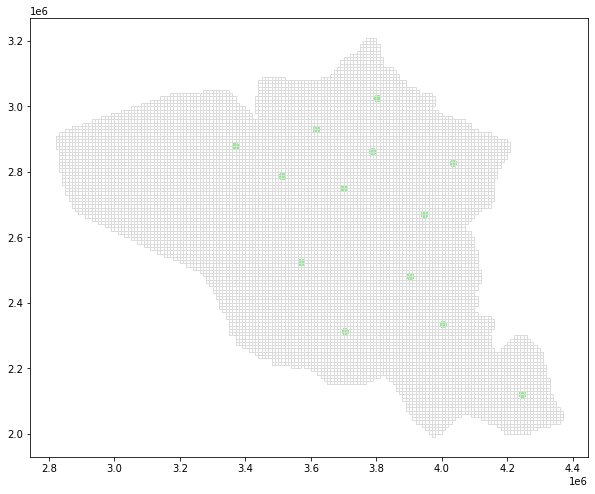

In [12]:
# Define a base map with county boundaries
ax = contour_france.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
geodataframe.to_crs(epsg=3035).plot(color='lightgreen', ax=ax)

In [13]:
print(geodataframe.crs)

+init=epsg:4326 +type=crs


In [14]:
print(contour_departement.crs)
print(contour_region.crs)
print(contour_france.crs)

epsg:4326
epsg:4326
epsg:3035


In [15]:
ax = world.plot(figsize=(20, 20), color='none', edgecolor='black')
geodataframe.plot(color="blue", ax=ax, markersize=2)


NameError: name 'world' is not defined

In [ ]:
world.plot()

In [ ]:
tt = gpd.read_file("C:/Users/Bast/Desktop/t.geojson")

In [ ]:
tt.head()

In [ ]:
print(tt.crs)

In [ ]:
# Define a base map with county boundaries
ax = tt.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
geodataframe.plot(color='lightgreen', ax=ax)

In [ ]:
geodataframe.head()

In [16]:
print(geodataframe[(geodataframe.departement == 'Ain')]['hospitalises'].idxmax())

262


In [17]:
test = geodataframe[(geodataframe.departement == 'Ain')]['hospitalises'][-1:]


In [18]:
print(geodataframe[(geodataframe.region == 'Auvergne-Rhône-Alpes') & (geodataframe.date == '2020-11-03')]['hospitalises'].sum())

5576


In [31]:
# Hospitalisation par région pour une date spécifique
group_region = geodataframe.groupby(['region', 'date', 'lat', 'lon'])['hospitalises'].sum()

In [32]:
group_region

region                date        lon       lat      
Auvergne-Rhône-Alpes  2020-02-08  4.660481  45.296812       5
                      2020-02-10  4.660481  45.296812       0
                      2020-02-11  4.660481  45.296812       0
                      2020-02-12  4.660481  45.296812       0
                      2020-02-20  4.660481  45.296812       0
                                                         ... 
Île-de-France         2020-11-15  2.753786  48.644306    6693
                      2020-11-16  2.753786  48.644306    6610
                      2020-11-17  2.753786  48.644306    6554
                      2020-11-18  2.753786  48.644306    6478
                      2020-11-19  2.753786  48.644306    6432
Name: hospitalises, Length: 3411, dtype: int64

In [ ]:
# Create the map
m_3 = folium.Map(location=[48.8534,2.3488], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in geodataframe.iterrows():
    mc.add_child(Marker([row['lat'], row['lon']]))
m_3.add_child(mc)

# Display the map
m_3

In [33]:
for idx,value in group_region.iteritems():
    print(idx)
    

('Auvergne-Rhône-Alpes', '2020-02-08', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-10', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-11', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-12', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-20', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-25', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-02-27', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-02', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-03', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-04', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-05', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-06', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-07', 4.6604809000000005, 45.2968119)
('Auvergne-Rhône-Alpes', '2020-03-08', 4.6604809000000005, 45.2968119)
('Auve

('Île-de-France', '2020-08-19', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-20', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-21', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-22', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-23', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-24', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-25', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-26', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-27', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-28', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-29', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-30', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-08-31', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-09-01', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-09-02', 2.7537863, 48.644305700000004)
('Île-de-France', '2020-09-03', 2.7537863, 48.644305700

In [21]:
pp.date[pp['date' == '2020-0--3-03']]

KeyError: 'Column not found: False'

In [22]:
pp.first()

departement  hospitalises  reanimations  nvx_hospitalises  \
date                                                                   
2020-01-24     Gironde             1             0                 0   
2020-01-25     Gironde             1             0                 0   
2020-01-26     Gironde             1             0                 0   
2020-01-27     Gironde             1             0                 0   
2020-01-28     Gironde             1             0                 0   
...                ...           ...           ...               ...   
2020-11-15         Ain           417            27                 8   
2020-11-16         Ain           424            25                24   
2020-11-17         Ain           432            24                40   
2020-11-18         Ain           436            25                26   
2020-11-19         Ain           428            28                40   

            nvlles_reanimations  gueris  deces                region  \
date                                                                   
2020-01-24                    0       0      0    Nouvelle-Aquitaine   
2020-01-25                    0       0      0    Nouvelle-Aquitaine   
2020-01-26                    0       0      0    Nouvelle-Aquitaine   
2020-01-27                    0       0      0    Nouvelle-Aquitaine   
2020-01-28                    0       0      0    Nouvelle-Aquitaine   
...                         ...     ...    ...                   ...   
2020-11-15                    0     955    219  Auvergne-Rhône-Alpes   
2020-11-16                    0     960    229  Auvergne-Rhône-Alpes   
2020-11-17                    1     990    234  Auvergne-Rhône-Alpes   
2020-11-18                    4    1007    237  Auvergne-Rhône-Alpes   
2020-11-19                    3    1047    247  Auvergne-Rhône-Alpes   

                  lat       lon                  geometry  
date                                                       
2020-01-24  45.403937  0.375620  POINT (0.37562 45.40394)  
2020-01-25  45.403937  0.375620  POINT (0.37562 45.40394)  
2020-01-26  45.403937  0.375620  POINT (0.37562 45.40394)  
2020-01-27  45.403937  0.375620  POINT (0.37562 45.40394)  
2020-01-28  45.403937  0.375620  POINT (0.37562 45.40394)  
...               ...       ...                       ...  
2020-11-15  45.296812  4.660481  POINT (4.66048 45.29681)  
2020-11-16  45.296812  4.660481  POINT (4.66048 45.29681)  
2020-11-17  45.296812  4.660481  POINT (4.66048 45.29681)  
2020-11-18  45.296812  4.660481  POINT (4.66048 45.29681)  
2020-11-19  45.296812  4.660481  POINT (4.66048 45.29681)  

[287 rows x 11 columns]

In [23]:
# afficher par departement pas possible pour l instant pas les coords des départements
# afficher les hospitalisations par régions:
# Grouper les départements par région et aggréger les hospitalisations / dep à une date précise 22/11/2020 par exemple

tt = geodataframe.groupby(['region'])

In [ ]:
tt.first()

In [ ]:
tt.obj.columns

In [ ]:
tt[tt.obj.date == '2020-03-03']

In [ ]:
ok = geodataframe.copy()

In [ ]:
ok.set_index(['region', 'departement', 'date'], inplace=True)

In [ ]:
ok.index

In [ ]:
ok.loc[('Auvergne-Rhône-Alpes','Ain','2020-03-03')]